# Binary classification of images with a convolutional DNN

In [ ]:
!apt-get install unzip

!pip install -U --no-cache-dir \
  tensorflow==1.13.1 \
  tensorflow-gpu==1.13.1 \
  kaggle \
  pillow

%load_ext tensorboard.notebook

In [ ]:
!echo '{"username":"","key":""}' > /content/kaggle.json \
  && chmod 600 /content/kaggle.json
        
!KAGGLE_CONFIG_DIR=/content/.kaggle kaggle competitions download -c dogs-vs-cats -p /content/data

!unzip -n -q /content/data/train.zip -d /content/data
!unzip -n -q /content/data/test1.zip -d /content/data


The data I have for this problem is a large collection of images containing either a cat or a dog. The sizes of these images vary.

Populating the interactive namespace from numpy and matplotlib
Image count: {25000}


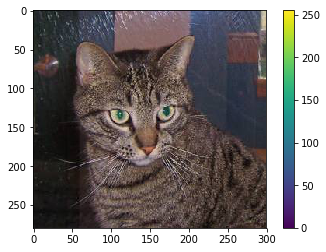

In [35]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

original_data_dir = '/content/data/train'

original_data_count = len([name for name in os.listdir(original_data_dir)])
print("Image count: %s" % {original_data_count})

img = mpimg.imread(os.path.join(original_data_dir, 'cat.1.jpg'))
imgplot = plt.imshow(img)
plt.colorbar()
plt.show()

I want to make this a small data problem so I'll seperate the training data into three collections. A training set of 1000. A validation set of 500. And, a validation set of 500. Sub directories are added the two class as I'll be using Keras's ImageDataGenerator to read in the images.

In [38]:
import shutil

base_dir = '/content/data/cats-dogs-small'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
for i in range(1000):
    src = os.path.join(original_data_dir, 'cat.%s.jpg') % i
    dst = os.path.join(train_cats_dir, '%s.jpg') % i
    shutil.copyfile(src, dst)
    
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
for i in range(1000):
    src = os.path.join(original_data_dir, 'dog.%s.jpg') % i
    dst = os.path.join(train_dogs_dir, '%s.jpg') % i
    shutil.copyfile(src, dst)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
for i in range(1000, 1500):
    src = os.path.join(original_data_dir, 'cat.%s.jpg') % i
    dst = os.path.join(validation_cats_dir, '%s.jpg') % i
    shutil.copyfile(src, dst)
    
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
for i in range(1000, 1500):
    src = os.path.join(original_data_dir, 'dog.%s.jpg') % i
    dst = os.path.join(validation_dogs_dir, '%s.jpg') % i
    shutil.copyfile(src, dst)
    
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
for i in range(1500, 2000):
    src = os.path.join(original_data_dir, 'cat.%s.jpg') % i
    dst = os.path.join(test_cats_dir, '%s.jpg') % i
    shutil.copyfile(src, dst)
    
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
for i in range(1500, 2000):
    src = os.path.join(original_data_dir, 'dog.%s.jpg') % i
    dst = os.path.join(test_dogs_dir, '%s.jpg') % i
    shutil.copyfile(src, dst)

# check image collections are sized correctly
print('Train cats: %s' % len(os.listdir(train_cats_dir)))
print('Train dogs: %s' % len(os.listdir(train_dogs_dir)))
print('Validate cats: %s' % len(os.listdir(validation_cats_dir)))
print('Validate dogs: %s' % len(os.listdir(validation_dogs_dir)))
print('Test cats: %s' % len(os.listdir(test_cats_dir)))
print('Test dogs: %s' % len(os.listdir(test_dogs_dir)))

Train cats: 1000
Train dogs: 1000
Validate cats: 500
Validate dogs: 500
Test cats: 500
Test dogs: 500


Images in JPEG format really aren't suitable inputs fore the model. They need reworked into tensors. Decoding a JPEG into a bitmap gives me a tensor with shape (150, 150, 3).

In [ ]:
%tensorboard --logdir logs/